PASO 1: IMPORTAMOS LOS PAQUETES NECESARIOS PARA LA REALIZACIÓN DE LA PRÁCTICA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, KFold

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, \
                            silhouette_score, recall_score, precision_score, make_scorer, \
                            roc_auc_score, f1_score, precision_recall_curve

from sklearn.metrics import accuracy_score, roc_auc_score, \
                            classification_report, confusion_matrix


from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

PASO 2: LEEMOS EL DATASET Y LO REPRESENTAMOS

In [5]:
df_selected = pd.read_csv('df_selected.csv')

In [105]:
df_selected.describe(include = 'all')

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,application_type,acc_open_past_24mths,mort_acc,pub_rec_bankruptcies,tax_liens,disbursement_method,issue_month,issue_year,earliest_cr_year,credit_history
count,442335.000000,442335.000000,442335.000000,442335.000000,442335.000000,442335.000000,442335,442335,442335.000000,442335,...,442335.000000,442335.000000,442335.000000,442335.000000,442335.000000,442335.000000,442335,442335.000000,442335.000000,442335.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,7,35,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,C,C1,NaN,MORTGAGE,...,NaN,NaN,NaN,NaN,NaN,NaN,Oct,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,124885,26548,NaN,220364,...,NaN,NaN,NaN,NaN,NaN,NaN,56111,NaN,NaN,NaN
mean,14566.416856,14566.416856,14561.066882,42.140378,13.255884,439.935320,NaN,NaN,5.767755,NaN,...,0.002258,4.795908,1.776111,0.147868,0.056475,0.000020,NaN,2014.599414,1998.159006,16.440408
std,8500.018979,8500.018979,8496.756229,10.472109,4.471144,252.505972,NaN,NaN,3.722447,NaN,...,0.047470,3.143748,2.089641,0.397284,0.419215,0.004511,NaN,0.670304,7.464446,7.429709
min,1000.000000,1000.000000,900.000000,36.000000,5.320000,14.010000,NaN,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2014.000000,1944.000000,3.000000
25%,8000.000000,8000.000000,8000.000000,36.000000,9.990000,256.900000,NaN,NaN,2.000000,NaN,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,2014.000000,1994.000000,11.000000
50%,12500.000000,12500.000000,12500.000000,36.000000,12.990000,378.760000,NaN,NaN,6.000000,NaN,...,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,NaN,2015.000000,2000.000000,15.000000
75%,20000.000000,20000.000000,20000.000000,60.000000,15.990000,579.720000,NaN,NaN,10.000000,NaN,...,0.000000,6.000000,3.000000,0.000000,0.000000,0.000000,NaN,2015.000000,2003.000000,20.000000


PASO 3: MODIFICAMOS LOS VALORES DE LAS VARIABLES CATEGÓRICAS A TRAVÉS DEL MÉTODO GET DUMMIES

In [6]:
#primero, comprobamos de qué tipo es cada columna del df; segundo, nos quedamos con aquellas que sean de tipo objeto
#(categóricas); tercero, creamos un nuevo df con las columnas tipo objeto y sus nombres; por último, creamos una lista con tales
#nombres de columnas 

df_categorical_cols = df_selected.dtypes.to_frame('feature_type')
df_categorical_cols = df_categorical_cols[df_categorical_cols['feature_type'] == 'object'] 
df_categorical_cols.reset_index(inplace=True)
df_categorical_cols.rename(columns={'index': 'categorical'}, inplace=True)
categorical_list = df_categorical_cols.categorical.to_list()
categorical_list

['grade',
 'sub_grade',
 'home_ownership',
 'purpose',
 'addr_state',
 'issue_month']

In [7]:
#seleccionamos las columnas categóricas de df_selected extraídas en el paso anterior
df_selected[categorical_list]

,grade,sub_grade,home_ownership,purpose,addr_state,issue_month
0,A,A4,OWN,credit_card,CA,Jun
1,E,E3,RENT,debt_consolidation,WA,Jun
2,A,A4,MORTGAGE,debt_consolidation,TX,Jun
3,C,C5,RENT,debt_consolidation,CA,Jun
4,C,C5,MORTGAGE,debt_consolidation,MA,Jun
...,...,...,...,...,...,...
442330,D,D1,RENT,credit_card,TX,Jan
442331,B,B5,MORTGAGE,credit_card,OH,Jan
442332,D,D2,RENT,debt_consolidation,TN,Jan
442333,E,E3,RENT,debt_consolidation,MA,Jan


In [8]:
#procedemos a transformar sus valores categóricos mediante la función de Pandas get_dummies
df_selected = pd.get_dummies(df_selected, columns = categorical_list)
df_selected

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,verification_status,loan_status,...,issue_month_Dec,issue_month_Feb,issue_month_Jan,issue_month_Jul,issue_month_Jun,issue_month_Mar,issue_month_May,issue_month_Nov,issue_month_Oct,issue_month_Sep
0,11575.0,11575.0,11575.0,36,7.35,359.26,6,153000.0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,7200.0,7200.0,7200.0,36,24.85,285.70,2,50000.0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,7500.0,7500.0,7500.0,36,7.35,232.79,7,110000.0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,10000.0,10000.0,10000.0,60,16.02,243.29,7,51979.0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,14000.0,14000.0,14000.0,36,16.02,492.34,7,75000.0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442330,11575.0,11575.0,11575.0,36,15.59,404.61,10,25400.0,0,0,...,0,0,1,0,0,0,0,0,0,0
442331,12000.0,12000.0,12000.0,36,11.99,398.52,1,63000.0,0,1,...,0,0,1,0,0,0,0,0,0,0
442332,13000.0,13000.0,13000.0,60,15.99,316.07,5,35000.0,0,1,...,0,0,1,0,0,0,0,0,0,0
442333,12000.0,12000.0,12000.0,60,19.99,317.86,1,64400.0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [9]:
def evaluate_model(ytest, ypred, ypred_proba = None):
    if ypred_proba is not None:
        print('ROC-AUC score of the model: {}'.format(roc_auc_score(ytest, ypred_proba[:, 1])))
    print('Accuracy of the model: {}\n'.format(accuracy_score(ytest, ypred)))
    print('Classification report: \n{}\n'.format(classification_report(ytest, ypred)))
    print('Confusion matrix: \n{}\n'.format(confusion_matrix(ytest, ypred)))

PASO 4: PREPARAMOS LOS DATOS CON LA REALIZACIÓN DE UN UPSAMPLING PARA LOS VALORES IGUAL A 1 CON SEMILLA=0 Y UNIMOS EL DATA FRAME OBTENIDO AL DF_MAJOR, CUYOS VALORES DE LOAN STATUS SON IGUAL A 0

In [10]:
df_major = df_selected[df_selected.loan_status == 0]
df_minor = df_selected[df_selected.loan_status == 1]

In [110]:
#se hace un upsampling porque el valor de los 1 es menor que el de 0
df_minor_upsmapled = resample(df_minor, replace = True, n_samples = 358436, random_state = 0)

In [111]:
#pasa de tener 97000 filas a 358436
df_minor_upsmapled

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,verification_status,loan_status,...,issue_month_Dec,issue_month_Feb,issue_month_Jan,issue_month_Jul,issue_month_Jun,issue_month_Mar,issue_month_May,issue_month_Nov,issue_month_Oct,issue_month_Sep
332500,5000.0,5000.0,5000.0,36,13.33,169.27,0,38000.0,0,1,...,0,0,0,1,0,0,0,0,0,0
239643,9000.0,9000.0,9000.0,36,10.64,293.12,5,40000.0,0,1,...,1,0,0,0,0,0,0,0,0,0
236187,3000.0,3000.0,3000.0,36,10.64,97.71,10,75000.0,0,1,...,1,0,0,0,0,0,0,0,0,0
248252,16000.0,16000.0,16000.0,60,14.33,375.04,10,56000.0,0,1,...,0,0,0,0,0,0,0,1,0,0
123163,12575.0,12575.0,12575.0,60,16.99,312.46,0,46700.0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254515,30000.0,30000.0,29900.0,60,16.99,745.42,1,64000.0,0,1,...,0,0,0,0,0,0,0,1,0,0
9000,19000.0,19000.0,19000.0,36,29.99,806.48,1,50000.0,0,1,...,0,0,0,0,0,0,0,0,0,0
229880,15000.0,15000.0,15000.0,36,13.67,510.27,10,68000.0,0,1,...,1,0,0,0,0,0,0,0,0,0
384898,20000.0,20000.0,20000.0,36,12.29,667.06,10,50000.0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [112]:
df_minor_upsmapled = pd.concat([df_minor_upsmapled, df_major])


In [113]:
df_minor_upsmapled.loan_status.value_counts()

1    358436
0    345335
Name: loan_status, dtype: int64

In [114]:
#separa la muestra para estudiar si pagan o no pagan; luego se entrenará y se hará test sobre x e y. como el método get dummies
#entrena y transforma los datos en un solo paso, se evita el uso de fit_transfomer
#x será la información adicional para saber si pagaron o no, mientras que la y informa de si pagaron finalmente o no (0-1)
X = df_minor_upsmapled.drop('loan_status', axis = 1)
Y = df_minor_upsmapled.loan_status

PASO 5: DIVIDIMOS LA MUESTRA ENTRE TRAIN Y TEST PARA X (VARIABLES CONTEXTUALES) E Y (VARIABLE EXPLICATIVA)

In [115]:
#dividimos en train y test con una semilla igual a 0
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25, random_state=0)

<AxesSubplot:xlabel='loan_status', ylabel='count'>

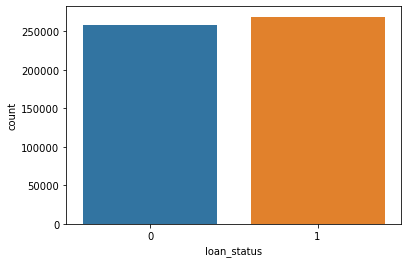

In [116]:
#dibujamos el plot del ytrain en función de sus 0 y 1
sns.countplot(ytrain)

In [117]:
#esta es la proporción pintada anteriormente
ytrain.value_counts()/len(ytrain)

1    0.509664
0    0.490336
Name: loan_status, dtype: float64

In [21]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
import seaborn as sns
from sklearn import tree

PASO 6: PREDECIMOS EL VALOR DE LA CUARTA POSICIÓN DEL TEST Y EVALUAMOS EL MODELO OBTENIDO 

In [119]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(xtrain, ytrain)

In [120]:
#predecir la cuarta posición del test  
clf.predict(xtest.iloc[[3,]])

array([1], dtype=int64)

In [121]:
ypred = clf.predict(xtest)

In [122]:
#evaluamos el modelo con la fórmula de antes y nos sale una accuracy del 86.45%
evaluate_model(ytest, ypred)

Accuracy of the model: 0.864518622508426

Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.77      0.85     86522
           1       0.81      0.96      0.88     89421

    accuracy                           0.86    175943
   macro avg       0.88      0.86      0.86    175943
weighted avg       0.88      0.86      0.86    175943


Confusion matrix: 
[[66269 20253]
 [ 3584 85837]]



PASO 7: REALIZAMOS LA MATRIZ DE CONFUSIÓN NORMALIZADA Y SIN NORMALIZAR DEL MODELO, REPRESENTAMOS SU CURVA ROC Y CALCULAMOS SU F1

Confusion matrix, without normalization
[[66269 20253]
 [ 3584 85837]]
Normalized confusion matrix
[[0.76592081 0.23407919]
 [0.04008007 0.95991993]]


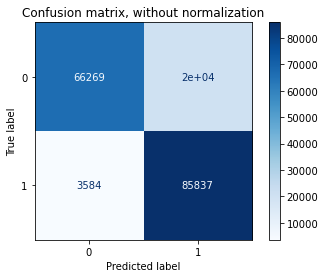

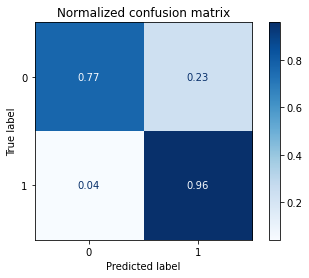

In [124]:
# Matriz de confusión normalizada y sin normalizar
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, xtest, ytest,
                                 # display_labels=ytest,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

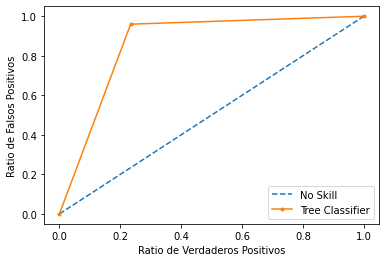

In [125]:
#Curva ROC
prob_predictions = clf.predict_proba(xtest)
yhat = prob_predictions[:, 1]
# Calculamos curva ROC
fpr, tpr, thresholds = roc_curve(ytest, yhat)
# Gráficamos la curva ROC del modelo
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Tree Classifier')
# Labels
plt.xlabel('Ratio de Verdaderos Positivos')
plt.ylabel('Ratio de Falsos Positivos')
plt.legend()
# show
plt.show()

In [126]:
#recall del 96%
recall_score(ytest, ypred)

0.9599199293230897

In [127]:
#precisión del 80.90%
precision_score(ytest, ypred)

0.8090960505231407

In [128]:
# evaluate the model - F1
score = f1_score(ytest, ypred)
print('F-Score: %.5f' % score)

F-Score: 0.87808


PASO 8: COGEMOS UNA MUESTRA DE 1000 OBSERVACIONES PARA REPRESENTAR EN ÁRBOL DE DECISIÓN PARA REDUCIR LOS TIEMPOS DE CARGA DEL ORDENADOR

In [129]:
#cogemos una muestra de datos más reducida puesto que con todo el dataset el ordenador es incapaz de realizar el árbol
df_minor_upsmapled_short = df_minor_upsmapled.sample(n=1000)

In [130]:
X2 = df_minor_upsmapled_short.drop('loan_status', axis = 1)
Y2 = df_minor_upsmapled_short.loan_status
feature_cols = X.columns.values.tolist()

In [131]:
#dividimos en train y test con una semilla igual a 0
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(X2, Y2, test_size=0.25, random_state=0)

<AxesSubplot:xlabel='loan_status', ylabel='count'>

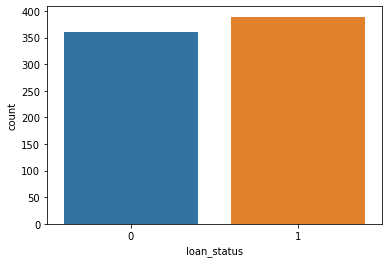

In [132]:
#dibujamos el plot del ytrain en función de sus 0 y 1
sns.countplot(ytrain2)

In [30]:
from six import StringIO
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [31]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [133]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(xtrain2,ytrain2)

#Predict the response for test dataset
y_pred = clf.predict(xtest2)

[Text(188.90089140455532, 211.4, 'X[4] <= 13.255\ngini = 0.499\nsamples = 750\nvalue = [361, 389]'),
 Text(126.61100189804773, 199.32, 'X[46] <= 0.5\ngini = 0.446\nsamples = 334\nvalue = [222, 112]'),
 Text(102.7072532537961, 187.24, 'X[7] <= 80658.0\ngini = 0.418\nsamples = 303\nvalue = [213, 90]'),
 Text(81.04465835140998, 175.16, 'X[44] <= 0.5\ngini = 0.466\nsamples = 197\nvalue = [124, 73]'),
 Text(63.86437093275488, 163.07999999999998, 'X[3] <= 48.0\ngini = 0.442\nsamples = 173\nvalue = [116, 57]'),
 Text(49.83872017353579, 151.0, 'X[90] <= 0.5\ngini = 0.41\nsamples = 153\nvalue = [109, 44]'),
 Text(46.93373101952278, 138.92000000000002, 'X[9] <= 16.61\ngini = 0.402\nsamples = 151\nvalue = [109, 42]'),
 Text(30.50238611713666, 126.84, 'X[7] <= 74500.0\ngini = 0.278\nsamples = 54\nvalue = [45, 9]'),
 Text(20.334924078091106, 114.75999999999999, 'X[39] <= 0.5\ngini = 0.198\nsamples = 45\nvalue = [40, 5]'),
 Text(14.524945770065077, 102.67999999999999, 'X[118] <= 0.5\ngini = 0.133\ns

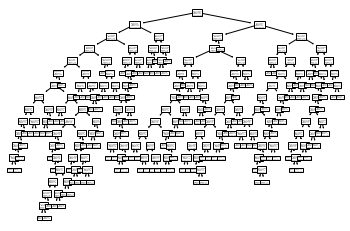

In [134]:
#obtenemos los resultados del árbol
tree.plot_tree(clf)

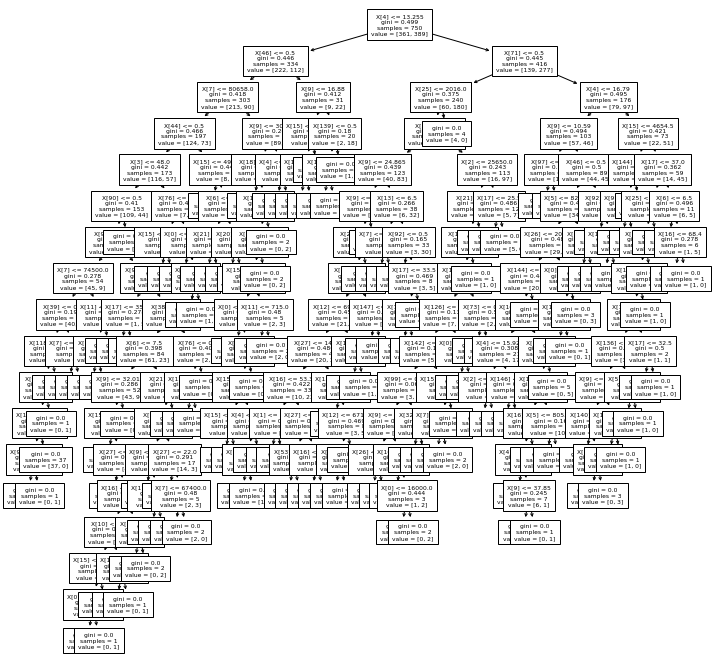

In [135]:
#dibujamos el árbol de decisión
plt.figure(figsize=(12,12))
tree.plot_tree(clf, fontsize=6)
plt.savefig('tree_high_dpi', dpi=100)

PASO 9: COMPROBAMOS LA VERACIDAD DEL MODELO CAMBIANDO LA SEMILLA Y COMPARANDO LOS RESULTADOS OBTENIDOS

In [11]:
df_minor_upsmapled_aux = resample(df_minor, replace = True, n_samples = 358436, random_state = 12345)

In [12]:
print(df_minor_upsmapled_aux)

        loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
400464    28250.0      28250.0          28250.0    36     15.61       987.76   
366148    12175.0      12175.0          12175.0    60     25.80       363.09   
22099      2000.0       2000.0           2000.0    36     18.54        72.85   
396340     5000.0       5000.0           5000.0    36     14.65       172.48   
32729     12400.0      12400.0          12400.0    60      8.67       255.43   
...           ...          ...              ...   ...       ...          ...   
157970    21075.0      21075.0          20975.0    60     19.47       552.17   
243800    10000.0      10000.0          10000.0    36     12.05       332.39   
21700      5825.0       5825.0           5825.0    36     18.54       212.17   
236605    35000.0      35000.0          34750.0    36     14.48      1204.40   
236034    18000.0      18000.0          18000.0    36     14.48       619.41   

        emp_length  annual_inc  verific

In [13]:
df_minor_upsmapled_aux = pd.concat([df_minor_upsmapled_aux, df_major])

In [14]:
X = df_minor_upsmapled_aux.drop('loan_status', axis = 1)
Y = df_minor_upsmapled_aux.loan_status

In [15]:
df_minor_upsmapled_aux.loan_status.value_counts()

1    358436
0    345335
Name: loan_status, dtype: int64

In [16]:
#comprobamos el modelo con otra semilla para confirmar que la división entre train y test de antes representaba bien el conjunto
#de datos
xtrain3, xtest3, ytrain3, ytest3 = train_test_split(X, Y, test_size=0.25, random_state=12345)

<AxesSubplot:xlabel='loan_status', ylabel='count'>

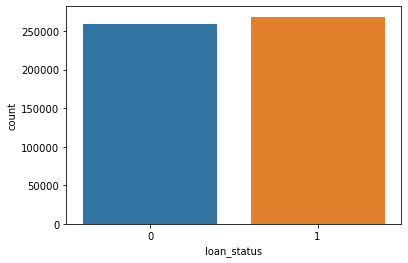

In [17]:
sns.countplot(ytrain3)

In [18]:
#el porcentaje de ceros y unos es bastante parecido al obtenido anteriormente
ytrain3.value_counts()/len(ytrain3)

1    0.508728
0    0.491272
Name: loan_status, dtype: float64

In [22]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(xtrain3, ytrain3)

In [23]:
ypred3 = clf.predict(xtest3)
ypred3

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [24]:
#accuracy del 86.60%, muy similar a la obtenida anteriormente con la otra semilla
evaluate_model(ytest3, ypred3)

Accuracy of the model: 0.8660702613914734

Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.77      0.85     86028
           1       0.81      0.96      0.88     89915

    accuracy                           0.87    175943
   macro avg       0.88      0.86      0.86    175943
weighted avg       0.88      0.87      0.86    175943


Confusion matrix: 
[[66127 19901]
 [ 3663 86252]]

